# DataViz on the LV database

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import sparse #I/O for .npz files (Scipy Sparse Matrices)

In [2]:
#data import
lv_data = pd.read_csv('../Yelp-NLP-Recommender/data/restaurant_reviews_las_vegas.csv')

In [3]:
lv_data.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars_x,...,is_open,categories,review_id,user_id,stars_y,date,text,useful,funny,cool
0,Pd52CjgyEU3Rb8co6QfTPw,"""Flight Deck Bar & Grill""",Southeast,"""6730 S Las Vegas Blvd""",Las Vegas,NV,89119.0,36.066914,-115.170848,4.0,...,1.0,Nightlife;Bars;Barbeque;Sports Bars;American (...,aG4aEOW86hut943oqL_DOg,9kV4tmBcE-l5tJqzgKjZRA,4.0,2017-03-27,"Nice, open bar with great views of the strip a...",0.0,0.0,1.0
1,Pd52CjgyEU3Rb8co6QfTPw,"""Flight Deck Bar & Grill""",Southeast,"""6730 S Las Vegas Blvd""",Las Vegas,NV,89119.0,36.066914,-115.170848,4.0,...,1.0,Nightlife;Bars;Barbeque;Sports Bars;American (...,fQpivmd02GA4eZJRZGgDQQ,i7Z7iiDSbWq-npAYHQUeew,5.0,2016-08-27,We usually stop here after using the driving r...,0.0,0.0,0.0
2,Pd52CjgyEU3Rb8co6QfTPw,"""Flight Deck Bar & Grill""",Southeast,"""6730 S Las Vegas Blvd""",Las Vegas,NV,89119.0,36.066914,-115.170848,4.0,...,1.0,Nightlife;Bars;Barbeque;Sports Bars;American (...,3recIhisA9vC4wnQOMCj7g,7Iga45IMB_VKyPZnbhSE2w,1.0,2016-01-09,The first time we ate here everything was good...,1.0,1.0,0.0
3,Pd52CjgyEU3Rb8co6QfTPw,"""Flight Deck Bar & Grill""",Southeast,"""6730 S Las Vegas Blvd""",Las Vegas,NV,89119.0,36.066914,-115.170848,4.0,...,1.0,Nightlife;Bars;Barbeque;Sports Bars;American (...,18i3YtCuEGMxYSS7fQdR8Q,IvBzaJeCcuChLuKGq3xhxA,2.0,2016-08-22,So I took my daughter there for breakfast and ...,1.0,0.0,0.0
4,Pd52CjgyEU3Rb8co6QfTPw,"""Flight Deck Bar & Grill""",Southeast,"""6730 S Las Vegas Blvd""",Las Vegas,NV,89119.0,36.066914,-115.170848,4.0,...,1.0,Nightlife;Bars;Barbeque;Sports Bars;American (...,brbrSd8nHkAEoN56ADEl9A,nIV1-sMoRFrnEtO1TUfLZQ,1.0,2015-10-28,This restaurant has a new name it used to be c...,1.0,0.0,0.0


In [121]:
#Random single
r = np.random.choice(range(len(lv_data)), size=1)[0]
r

736792

In [122]:
rand = r

In [123]:
# One of the reviews
print(lv_data['text'][rand])
print("Rating: ",lv_data['stars_y'][rand])

Very good food and fast service.  The fish was lightly breaded and very satisfying.  Fries were plentiful and enjoyable.
Rating:  5.0


Use this review/rating combo for the powerpoint.

And these histograms...

In [32]:
#Import the Processed Dataset and ratings

reviews_subset = sparse.load_npz('./data/reviews_subset_tfidf.npz')
ratings_subset = pd.read_csv('./data/ratings_subset.csv', header=None)


In [88]:
bins = np.arange(7)-0.5

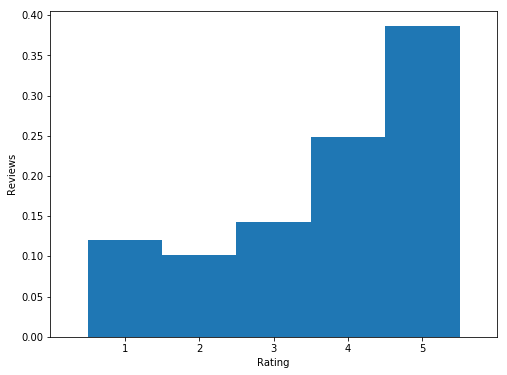

In [108]:
plt.figure(figsize=(8,6))
plt.hist(ratings_subset[1], bins=np.arange(7)-0.5, range=(1,6), density=True )
plt.xticks(range(1,6))
plt.xlim([0,6])
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.show()

Use the sample that I took in 03a NLP for the powerpoint.

From the previous section:

There are 2298 unique types/categories of restaurants in Las Vegas!


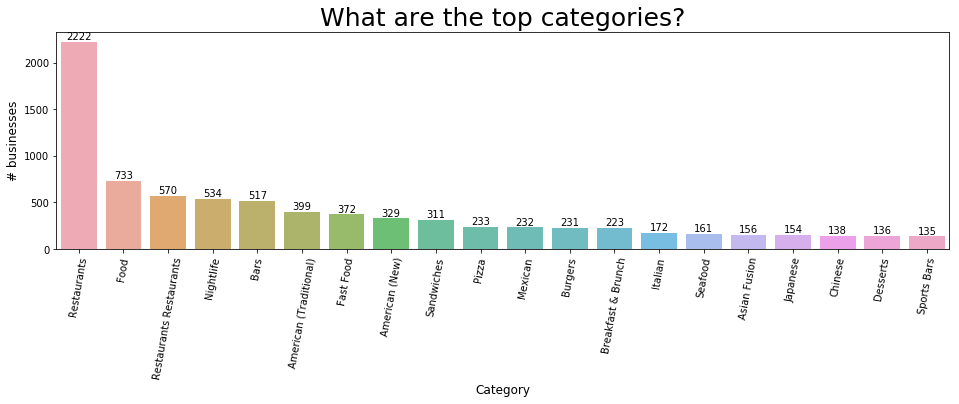

In [52]:
# Some EDA from Jagan Upta's Kaggle notebook
# https://www.kaggle.com/jagangupta/what-s-in-a-review-yelp-ratings-eda
restaurants_cats=' '.join(restaurants_LV['categories'])

cats=pd.DataFrame(restaurants_cats.split(';'),columns=['category'])
x=cats.category.value_counts()
print("There are",len(x),"unique types/categories of restaurants in Las Vegas!")
#prep for chart
x=x.sort_values(ascending=False)
x=x.iloc[0:20]

#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)#,color=color[5])
plt.title("What are the top categories?",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [32]:
restaurants_cats=' '.join(restaurants_LV['categories'])

cats=pd.DataFrame(restaurants_cats.split(';'),columns=['category'])

cats.category.value_counts()[:10]

Restaurants                2222
Food                        733
Restaurants Restaurants     570
Nightlife                   534
Bars                        517
American (Traditional)      399
Fast Food                   372
American (New)              329
Sandwiches                  311
Pizza                       233
Name: category, dtype: int64